<a href="https://colab.research.google.com/github/Aoisama11/Aoisama11/blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files

def upload_and_display_columns_colab():
    """
    Allow the user to upload a CSV file directly in Google Colab,
    read it, and display its column names.
    """
    try:
        print("Please upload your CSV file:")

        # Upload the file
        uploaded = files.upload()

        # Get the name of the uploaded file
        file_name = list(uploaded.keys())[0]
        print(f"File uploaded: {file_name}")

        # Load the CSV file into a Pandas DataFrame
        data = pd.read_csv(file_name)
        print(f"\nDataset loaded successfully with {data.shape[0]} rows and {data.shape[1]} columns.")

        # Display the column names
        print("\nColumn names in the dataset:")
        for i, column in enumerate(data.columns, start=1):
            print(f"{i}. {column}")

        # Return the DataFrame for further use
        return data

    except pd.errors.EmptyDataError:
        print("The file is empty. Please provide a valid CSV file.")
    except pd.errors.ParserError:
        print("The file could not be parsed. Please ensure it is a valid CSV file.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if __name__ == "__main__":
    # Run the function and get the DataFrame
    dataset = upload_and_display_columns_colab()

    if dataset is not None:
        print("\nYou can now use the dataset for further analysis!")

Please upload your CSV file:


Saving accident.csv to accident (3).csv
File uploaded: accident (3).csv

Dataset loaded successfully with 39785 rows and 80 columns.

Column names in the dataset:
1. STATE
2. STATENAME
3. ST_CASE
4. PEDS
5. PERNOTMVIT
6. VE_TOTAL
7. VE_FORMS
8. PVH_INVL
9. PERSONS
10. PERMVIT
11. COUNTY
12. COUNTYNAME
13. CITY
14. CITYNAME
15. MONTH
16. MONTHNAME
17. DAY
18. DAYNAME
19. DAY_WEEK
20. DAY_WEEKNAME
21. YEAR
22. HOUR
23. HOURNAME
24. MINUTE
25. MINUTENAME
26. TWAY_ID
27. TWAY_ID2
28. ROUTE
29. ROUTENAME
30. RUR_URB
31. RUR_URBNAME
32. FUNC_SYS
33. FUNC_SYSNAME
34. RD_OWNER
35. RD_OWNERNAME
36. NHS
37. NHSNAME
38. SP_JUR
39. SP_JURNAME
40. MILEPT
41. MILEPTNAME
42. LATITUDE
43. LATITUDENAME
44. LONGITUD
45. LONGITUDNAME
46. HARM_EV
47. HARM_EVNAME
48. MAN_COLL
49. MAN_COLLNAME
50. RELJCT1
51. RELJCT1NAME
52. RELJCT2
53. RELJCT2NAME
54. TYP_INT
55. TYP_INTNAME
56. REL_ROAD
57. REL_ROADNAME
58. WRK_ZONE
59. WRK_ZONENAME
60. LGT_COND
61. LGT_CONDNAME
62. WEATHER
63. WEATHERNAME
64. SCH_BUS
65.

In [ ]:
pip install pandas seaborn matplotlib folium

Please upload your CSV file.


Saving accident.csv to accident (7).csv
File uploaded: accident (7).csv

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39785 entries, 0 to 39784
Data columns (total 80 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATE         39785 non-null  int64  
 1   STATENAME     39785 non-null  object 
 2   ST_CASE       39785 non-null  int64  
 3   PEDS          39785 non-null  int64  
 4   PERNOTMVIT    39785 non-null  int64  
 5   VE_TOTAL      39785 non-null  int64  
 6   VE_FORMS      39785 non-null  int64  
 7   PVH_INVL      39785 non-null  int64  
 8   PERSONS       39785 non-null  int64  
 9   PERMVIT       39785 non-null  int64  
 10  COUNTY        39785 non-null  int64  
 11  COUNTYNAME    39785 non-null  object 
 12  CITY          39785 non-null  int64  
 13  CITYNAME      39785 non-null  object 
 14  MONTH         39785 non-null  int64  
 15  MONTHNAME     39785 non-null  object 
 16  DAY           39785 non-nul

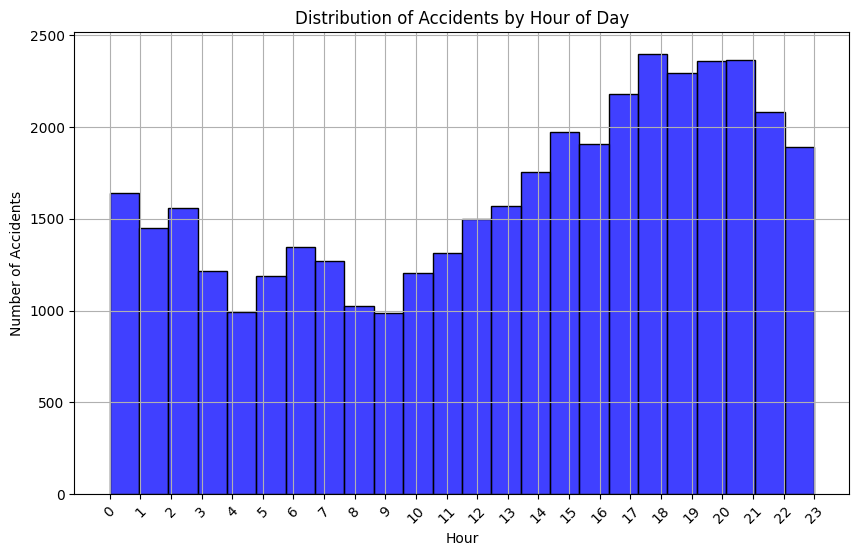

<ipython-input-26-10405bc0f1ed>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DAY_WEEK_NAME'] = data['DAY_WEEK'].map(day_mapping)  # Create a new column with day names
<ipython-input-26-10405bc0f1ed>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DAY_WEEK_NAME', data=data, order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], palette="viridis")


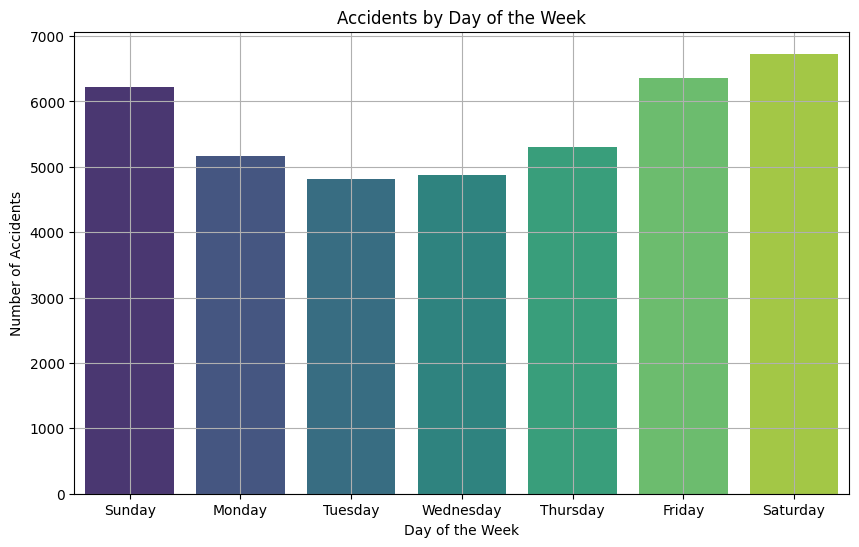

<ipython-input-26-10405bc0f1ed>:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WEATHER_LABEL'] = data['WEATHER'].map(weather_mapping).fillna("Other")
<ipython-input-26-10405bc0f1ed>:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


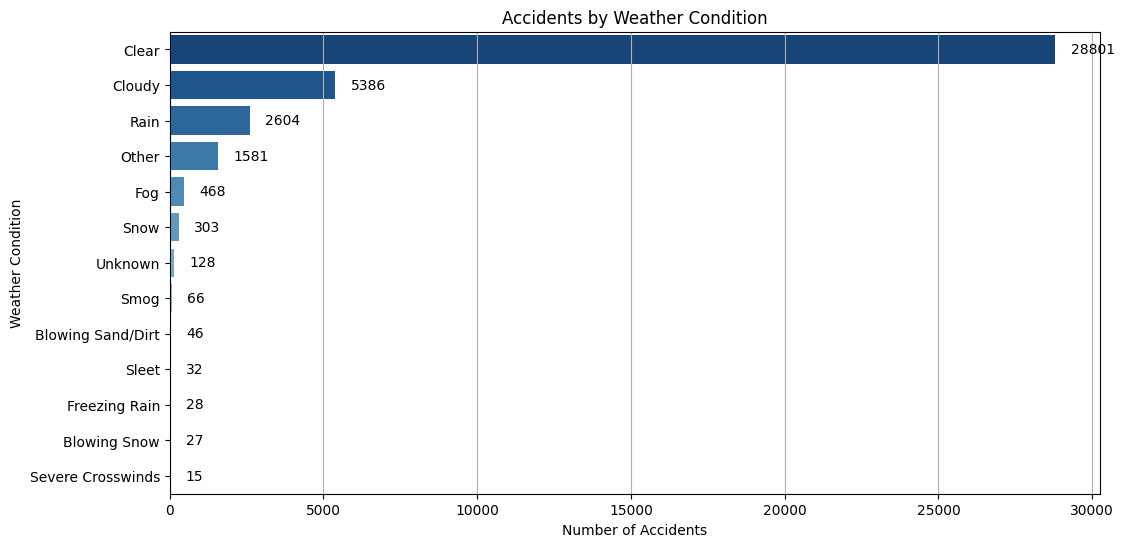

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from google.colab import files

def analyze_traffic_data(data):
    """
    Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day.
    Visualize accident hotspots and contributing factors.

    Parameters:
        data (pd.DataFrame): The traffic accident dataset.
    """
    # Display basic information about the dataset
    print("\nBasic Info:")
    print(data.info())

    # Print a sample of the data
    print("\nSample Data:")
    print(data.head())

    # Check for missing values
    print("\nMissing Values:")
    print(data.isnull().sum())

    # Summarize the dataset
    print("\nSummary Statistics:")
    print(data.describe())

    # Ensure the required columns exist
    required_columns = ['HOUR', 'DAY_WEEK', 'LATITUDE', 'LONGITUDE', 'WEATHER', 'ROAD_CONDITION']
    for col in required_columns:
        if col not in data.columns:
            print(f"Column '{col}' not found in dataset. Skipping related analysis.")

    # Filter valid hours (0-23) for time of day analysis
    if 'HOUR' in data.columns:
        data = data[(data['HOUR'] >= 0) & (data['HOUR'] <= 23)]  # Remove invalid/outlier hours
        plt.figure(figsize=(10, 6))
        sns.histplot(data['HOUR'], bins=24, kde=False, color='blue')
        plt.title("Distribution of Accidents by Hour of Day")
        plt.xlabel("Hour")
        plt.ylabel("Number of Accidents")
        plt.xticks(range(0, 24), rotation=45)  # Rotate x-axis labels to prevent overlap
        plt.grid()
        plt.savefig("hourly_distribution.png")  # Save plot as an image
        plt.show()

    # Analyze accidents by day of the week
    if 'DAY_WEEK' in data.columns:
        # Map numbers to day names
        day_mapping = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}
        data['DAY_WEEK_NAME'] = data['DAY_WEEK'].map(day_mapping)  # Create a new column with day names

        plt.figure(figsize=(10, 6))
        sns.countplot(x='DAY_WEEK_NAME', data=data, order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], palette="viridis")
        plt.title("Accidents by Day of the Week")
        plt.xlabel("Day of the Week")
        plt.ylabel("Number of Accidents")
        plt.grid()
        plt.savefig("day_of_week_distribution_named.png")  # Save plot as an image
        plt.show()

    # Analyze accidents by weather condition
    if 'WEATHER' in data.columns:
        # Map weather codes to readable labels
        weather_mapping = {
            1: "Clear",
            2: "Rain",
            3: "Sleet",
            4: "Snow",
            5: "Fog",
            6: "Smog",
            7: "Severe Crosswinds",
            8: "Blowing Sand/Dirt",
            10: "Cloudy",
            11: "Blowing Snow",
            12: "Freezing Rain",
            98: "Other",
            99: "Unknown"
        }
        data['WEATHER_LABEL'] = data['WEATHER'].map(weather_mapping).fillna("Other")

        # Group rare/unknown values under "Other/Unknown"
        grouped_data = data['WEATHER_LABEL'].value_counts()
        grouped_data = grouped_data.reset_index()
        grouped_data.columns = ['Weather Condition', 'Number of Accidents']
        grouped_data = grouped_data.sort_values('Number of Accidents', ascending=False)

        # Plot accidents by weather condition
        plt.figure(figsize=(12, 6))
        sns.barplot(
            y='Weather Condition',
            x='Number of Accidents',
            data=grouped_data,
            palette="Blues_r"  # Improved color palette
        )

        # Add count labels next to each bar
        for index, row in grouped_data.iterrows():
            plt.text(row['Number of Accidents'] + 500, index, f"{row['Number of Accidents']}", va='center')

        plt.title("Accidents by Weather Condition")
        plt.xlabel("Number of Accidents")
        plt.ylabel("Weather Condition")
        plt.grid(axis='x')
        plt.savefig("weather_condition_distribution_improved.png")  # Save plot as an image
        plt.show()

    # Visualize accident hotspots using latitude and longitude with Folium
    if 'LATITUDE' in data.columns and 'LONGITUDE' in data.columns:
        print("\nCreating an interactive map of accident hotspots...")
        accident_map = folium.Map(location=[data['LATITUDE'].mean(), data['LONGITUDE'].mean()], zoom_start=6)
        marker_cluster = MarkerCluster().add_to(accident_map)
        sampled_data = data.sample(n=min(500, len(data)), random_state=42)  # Limit to 500 points for performance
        for _, row in sampled_data.iterrows():
            folium.CircleMarker(
                location=[row['LATITUDE'], row['LONGITUDE']],
                radius=5,
                color='red',
                fill=True,
                fill_opacity=0.5
            ).add_to(marker_cluster)
        accident_map.save("accident_hotspots.html")
        print("Map saved as 'accident_hotspots.html'. Open this file in your browser to view it.")

    # Analyze accidents by road conditions
    if 'ROAD_CONDITION' in data.columns:
        plt.figure(figsize=(12, 6))
        sns.countplot(y='ROAD_CONDITION', data=data, order=data['ROAD_CONDITION'].value_counts().index, palette="mako")
        plt.title("Accidents by Road Condition")
        plt.xlabel("Number of Accidents")
        plt.ylabel("Road Condition")
        plt.grid()
        plt.savefig("road_condition_distribution.png")  # Save plot as an image
        plt.show()

if __name__ == "__main__":
    # File upload for Google Colab
    print("Please upload your CSV file.")
    uploaded = files.upload()  # Upload the file from the system
    file_name = list(uploaded.keys())[0]  # Get the file name
    print(f"File uploaded: {file_name}")

    try:
        data = pd.read_csv(file_name)  # Read the uploaded file into a DataFrame
        analyze_traffic_data(data)
    except Exception as e:
        print(f"An error occurred while loading the dataset: {e}")